## Lead Scoring Logistic Regression

## Problem Statement
An education company named __X Education__ sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. <br>

__When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals.__<br>

Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. __The typical lead conversion rate at X education is around 30%.__
 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as __‘Hot Leads’__. <br>

If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:
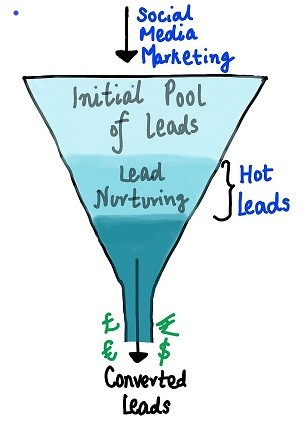



__Lead Conversion Process__ - Demonstrated as a funnel
As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom.<br>

In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion. 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. <br>
The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.

__The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.__


 

### Data

You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted.

Another thing that you also need to check out for are the levels present in the categorical variables.<br>

__Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value.__

 

### Goal


1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

### Importing Data

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

# Data display coustomization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [2]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np


In [3]:
#Read data
lead_df = pd.read_csv("Leads.csv", sep = "," , encoding = "ISO-8859-1", header = 0)
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Inspection of Dataframe

In [4]:
lead_df.shape

(9240, 37)

In [5]:
lead_df.size

341880

In [6]:
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
# Converting 'Select' values to NaN.
lead_df = lead_df.replace('Select', np.nan)

In [9]:
(lead_df.isnull().sum()/len(lead_df))*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

#### Removing null values

In [10]:
# we are dropping the columns with more than 40 % null values
lead_df = lead_df.drop(lead_df.loc[:,list(round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)>40)].columns, 1)

In [11]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [12]:
# Tags
lead_df['Tags'].astype('category').value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

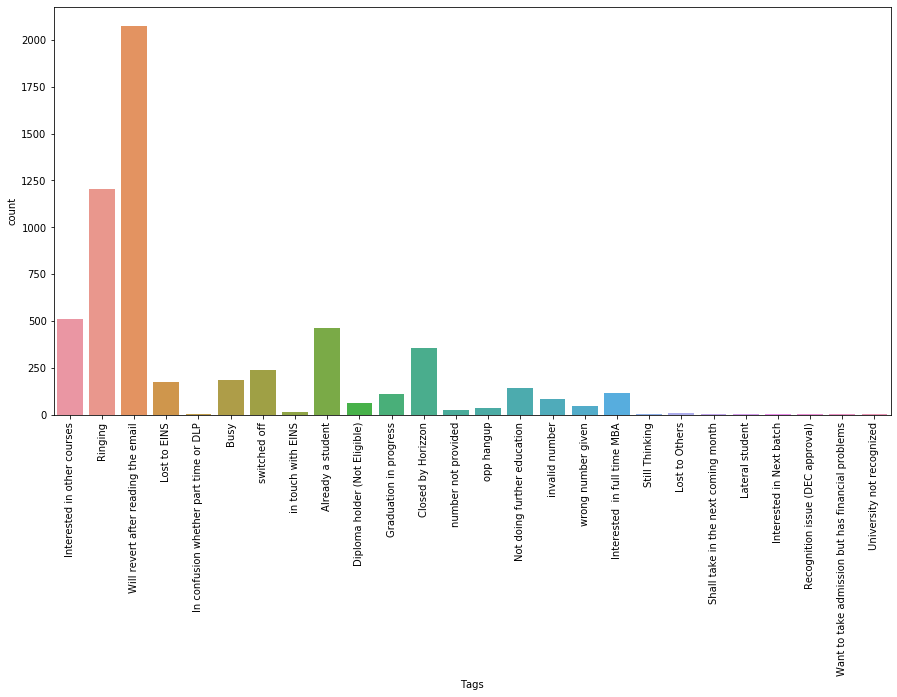

In [13]:
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(lead_df.Tags)
xticks(rotation = 90)

**Most of the count is in category "Will revert after reading the email" and similar quantity is unknown to us. So let us drop this column.**

In [14]:
# dropping Tags column
lead_df = lead_df.drop(['Tags'], axis=1)

In [15]:
# What matters most to you in choosing a course
lead_df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

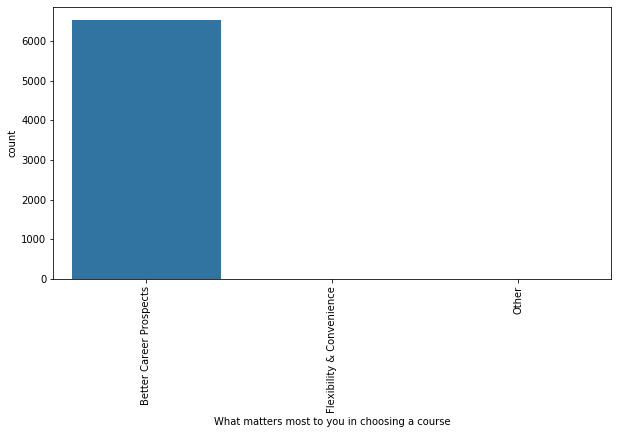

In [16]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(lead_df['What matters most to you in choosing a course'])
xticks(rotation = 90)

In [17]:
# Since most of the leads have selected Better Career Prospects we will replace null values with mode
lead_df['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects',inplace=True)
lead_df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [18]:
# City
lead_df.City.value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

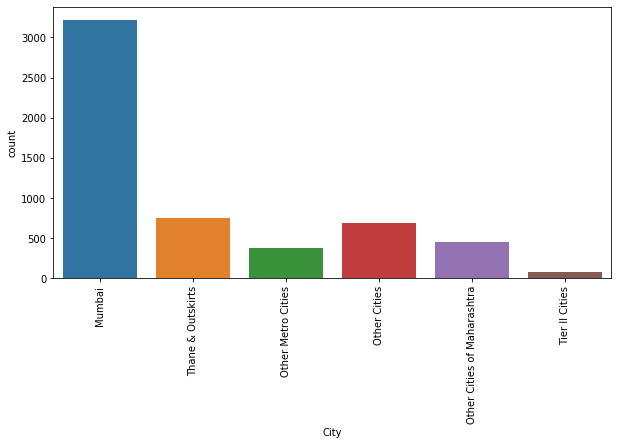

In [19]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(lead_df['City'])
xticks(rotation = 90)

In [20]:
# Merging less frequent cities into "Other" category
lead_df['City'].replace(['Other Cities of Maharashtra','Other Metro Cities','Tier II Cities'],'Other Cities',inplace=True)

In [21]:
lead_df.City.value_counts(normalize=True)

Mumbai               0.578352
Other Cities         0.286663
Thane & Outskirts    0.134985
Name: City, dtype: float64

In [22]:
lead_df.City.describe()

count       5571
unique         3
top       Mumbai
freq        3222
Name: City, dtype: object

**As we can see from the above stats for the 'City' column, around 60% of the data is Mumbai, and 39.7% of the data is Null.
Thus we would not get any significant lead after analysing this Column, so it is best to drop this column**

In [23]:
# dropping City Column
lead_df = lead_df.drop(['City'], axis=1)

In [24]:
# What is your current occupation

lead_df['What is your current occupation'].value_counts(normalize= 'True')

Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Other                   0.002443
Housewife               0.001527
Businessman             0.001221
Name: What is your current occupation, dtype: float64

**From the obervation we see that 85 % of the values that are present in the column are 'Unemployed' and out of all the rows 29 % are Null. So the data seems to have a imbalance, with "unemployed" being the most frequent and hence this column would not provide us with significant lead, Hence let us drop this column**


In [25]:
# Dropping 'What is your current occupation' column
lead_df = lead_df.drop(['What is your current occupation'], axis=1)

In [26]:
# Specialization
lead_df['Specialization'].describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 <a list of 18 Text xticklabel objects>)

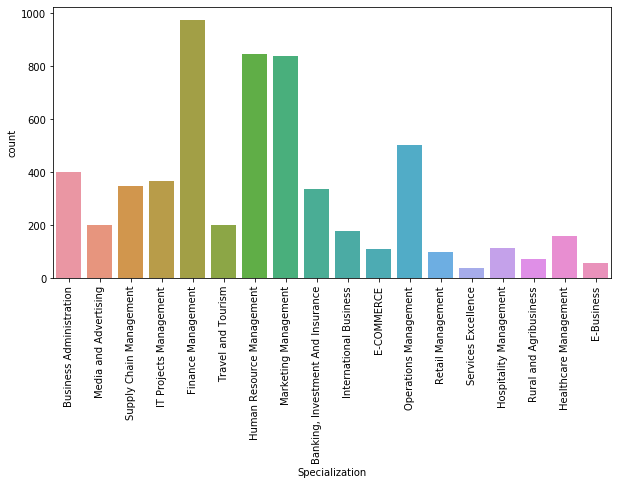

In [27]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(lead_df['Specialization'])
xticks(rotation = 90)

**The entries in the Specialization columns are well diversed, and one of the reason for missing values in this column, could be that the application might not have found their exact specailization while filling the form. Also, this column will be important for analying the leads, so we will categorize the missing values as 'other'**

In [28]:
# Categorizing Nulll values in the Specialization column as "Other"
lead_df['Specialization'] = lead_df['Specialization'].replace(np.nan, 'Others')

In [29]:
# country
lead_df['Country'].describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 <a list of 38 Text xticklabel objects>)

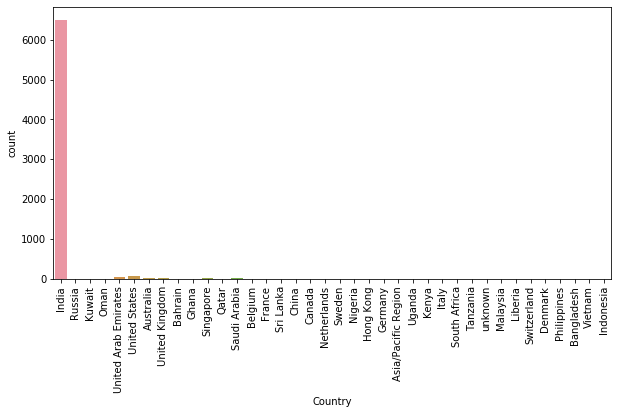

In [30]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(lead_df['Country'])
xticks(rotation = 90)

**All the leads are from India hence no inference can be achieved from this column , hence we are dropping it**

In [31]:
# Country is India for most values so we wont be able to get much information from it. So dropping the column
lead_df = lead_df.drop(['Country'], axis=1)

In [32]:
# Rest missing values are under 2% so we can drop these rows.
lead_df.dropna(inplace = True)

In [33]:
(lead_df.isnull().sum()/len(lead_df))*100

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Specialization                                   0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

### Univariate analysis

In [34]:
# Calculating % of of Non Converted and Converted Leads in the Dataset

round(100*lead_df['Converted'].value_counts(normalize=True),3).sort_values(ascending = False)

0    62.145
1    37.855
Name: Converted, dtype: float64

0 - Non Converted
1- Converted

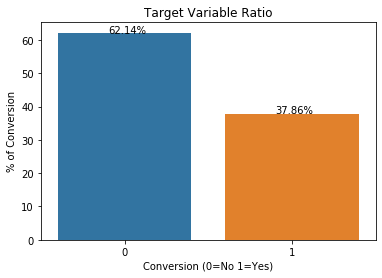

In [35]:
# Plot representing the Imbalance Percentage in lead DataFrame

ax = sns.barplot(x="Converted", y="Converted",
                 data=lead_df, estimator=lambda x: len(x) / len(lead_df) * 100)
ax.set(ylabel="Percent")
for p in ax.patches:
        ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.3, p.get_height()))

#round(lead['Converted'].value_counts(normalize=True),3).sort_values(ascending = False).plot(kind='bar')
plt.title('Target Variable Ratio')
plt.xlabel('Conversion (0=No 1=Yes)')
plt.xticks(rotation=0)
plt.ylabel('% of Conversion')
plt.show()

Our Target variable is having a 62:38 ratio, and seems to be imbalance with respect to the conversion ratio

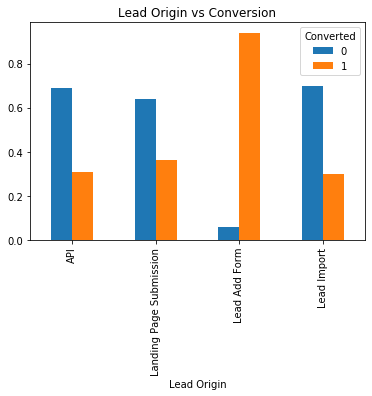

In [36]:
# Lead Origin

round(pd.crosstab(lead_df['Lead Origin'],lead_df.Converted).apply(lambda l: l/l.sum(),axis=1),2).plot(kind='bar')

plt.title('Lead Origin vs Conversion')
xticks(rotation = 90)
plt.show()

Leads with Add form orgin have more than 80% conversion rate.
Leads with landing page submission is around 40%
Least conversion rate is is from leads with API origin

**Inference:**
Inorder to improve the conversion rates, focus should be given to Leads from 'Add Form' origin

In [37]:
# Lead Source
lead_df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
youtubechannel          1
Pay per Click Ads       1
testone                 1
welearnblog_Home        1
WeLearn                 1
NC_EDM                  1
blog                    1
Name: Lead Source, dtype: int64

In [38]:
# We can observe there is a case difference in google , hence replacing google with Google are they are the same.
lead_df['Lead Source'].replace('google','Google',inplace=True)

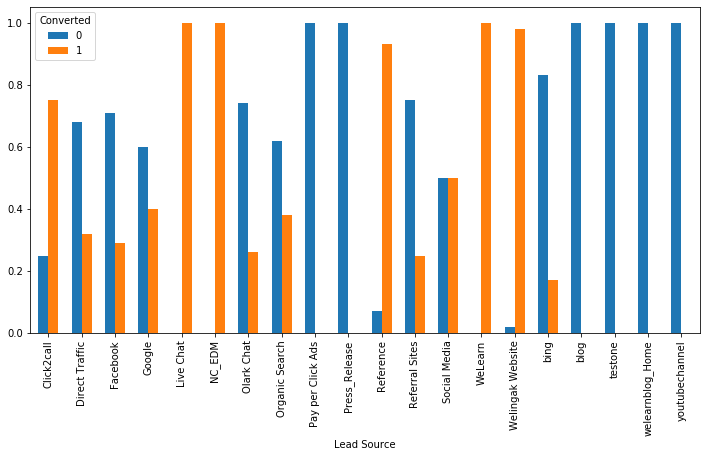

In [39]:
#Lead source
round(pd.crosstab(lead_df['Lead Source'],lead_df.Converted).apply(lambda r: r/r.sum(),axis=1),2).plot(kind='bar',figsize=(12,6),width=0.6)
xticks(rotation = 90)
plt.show()

Coversion rate of leads from LiveChat,NC_EDM,WeLearn and Welinggak Website is more than 90%
There is no conversion rated from bing,blog,testine,welearnblog_Home and youtubechannel have no conversion rate

**Inference**
Hence to increase the conversion rate we need to focus on leads **LiveChat,NC_EDM,WeLearn and Welinggak Website** origin

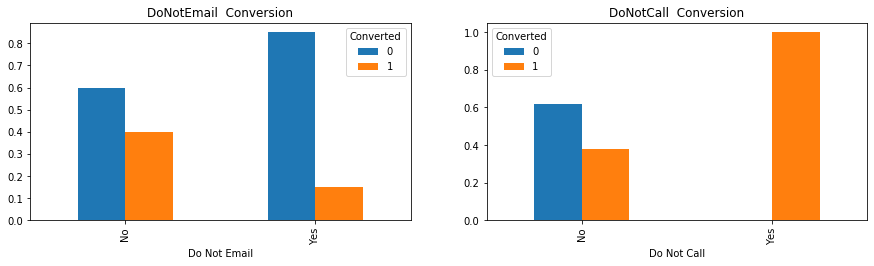

In [40]:
# Donot email and donot call
plt.figure(figsize=[15,8])
ax= plt.subplot(221)
round(pd.crosstab(lead_df['Do Not Email'],lead_df.Converted).apply(lambda r: r/r.sum(),axis=1),2).plot(kind='bar',ax=ax)
#round(lead_df['Do Not Email'].value_counts(normalize=True),2).plot(kind='bar')
plt.title('DoNotEmail  Conversion')
xticks(rotation = 90)
ax = plt.subplot(222)
round(pd.crosstab(lead_df['Do Not Call'],lead_df.Converted).apply(lambda r: r/r.sum(),axis=1),2).plot(kind='bar',ax=ax)
#round(lead_df['Do Not Call'].value_counts(normalize=True),2).plot(kind='bar')
plt.title('DoNotCall  Conversion')
xticks(rotation = 90)
plt.show()


In [41]:
# last activity
lead_df['Last Activity'].value_counts()

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [42]:
# we can see there are some low frequency values hence merge values into 'others' category
lead_df['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront',
                                                   'View in browser link Clicked','Email Received','Email Marked Spam','Resubscribed to emails',
                                                  'Visited Booth in Tradeshow'], 'Others',inplace=True)

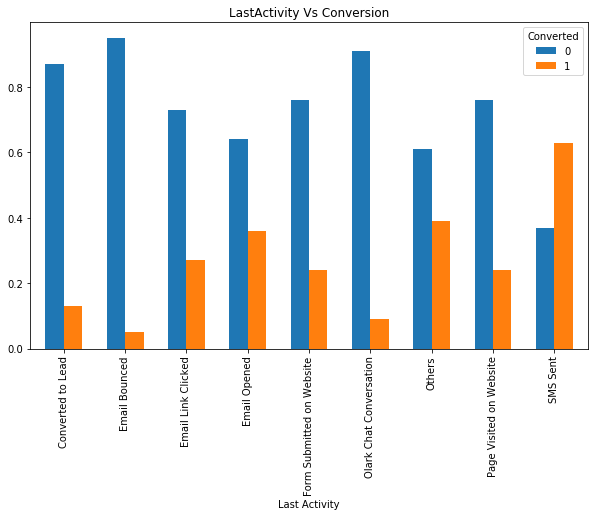

In [43]:
round(pd.crosstab(lead_df['Last Activity'],lead_df.Converted).apply(lambda r: r/r.sum(),axis=1),2).plot(kind='bar',figsize=(10,6),width=0.6)
plt.title('Last Activity vs Conversion')
plt.title('LastActivity Vs Conversion')
xticks(rotation = 90)
plt.show()

Leads with 'SMS Sent' activity has conversion rate around 60%
Leads with 'email bounced' have least conversion rate of less than 20%

**Inference**
Leads with last activity **SMS Sent** should be focused inorder to increase conversion rate

In [44]:
# Specialization
# last activity
lead_df['Specialization'].value_counts()

Others                               3282
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
Healthcare Management                 156
E-COMMERCE                            111
Hospitality Management                111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [45]:
# Converting less frequent values to others
lead_df['Specialization'].replace(['Rural and Agribusiness','E-Business','Services Excellence'], 'Other_Specialization',inplace=True)

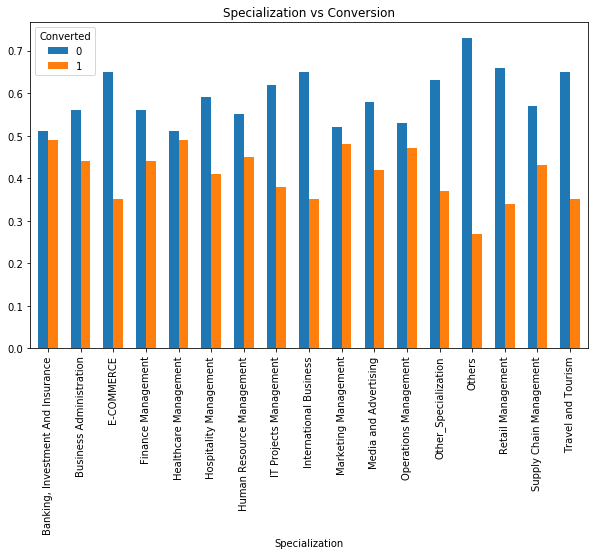

In [46]:
round(pd.crosstab(lead_df['Specialization'],lead_df.Converted).apply(lambda r: r/r.sum(),axis=1),2).plot(kind='bar',figsize=(10,6),width=0.6)
plt.title('Specialization vs Conversion')
xticks(rotation = 90)
plt.show()

Conversion rate highest for **Banking,Investment and Insurance and  Health care management** is around 50%

In [47]:
# What matters most to you in choosing this course
lead_df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      9072
Other                           1
Flexibility & Convenience       1
Name: What matters most to you in choosing a course, dtype: int64

**Almost all the leads have selected Better Career Prospects for choosing this course. No Inference can be drawn from this parameter**

In [48]:
#Search
lead_df.Search.value_counts()

No     9060
Yes      14
Name: Search, dtype: int64

**Most of the leads have not seen the ad in search.No Inference can be drawn from this parameter**

In [49]:
#magazine
lead_df.Magazine.value_counts()

No    9074
Name: Magazine, dtype: int64

**No lead is there who has seen the advertisement in Magazine.No Inference can be drawn from this parameter**

In [50]:
#newspaper article
lead_df['Newspaper Article'].value_counts()

No     9072
Yes       2
Name: Newspaper Article, dtype: int64

**Only 2 lead have seen the ad in newspaper article.No Inference can be drawn from this parameter**

In [51]:
#X Education Forums
lead_df['X Education Forums'].value_counts()

No     9073
Yes       1
Name: X Education Forums, dtype: int64

**Only 1 lead has seen the ad in Education forums.No Inference can be drawn from this parameter**

In [52]:
#newspaper 
lead_df['Newspaper'].value_counts()

No     9073
Yes       1
Name: Newspaper, dtype: int64

**Only 1 lead has seen the ad in newspaper.No Inference can be drawn from this parameter**

In [53]:
#Digital Advertisement 
lead_df['Digital Advertisement'].value_counts()

No     9070
Yes       4
Name: Digital Advertisement, dtype: int64

**Majority of leads are not aware of Digital advertisement.No Inference can be drawn from this parameter**

In [54]:
# Through recommendation
lead_df['Through Recommendations'].value_counts()

No     9067
Yes       7
Name: Through Recommendations, dtype: int64

**Most of the leads are not through recommendation.No Inference can be drawn from this parameter**

In [55]:
#Receive More Updates About Our Courses
lead_df['Receive More Updates About Our Courses'].value_counts()

No    9074
Name: Receive More Updates About Our Courses, dtype: int64

**All the leads have not availed to Receive More Updates About Our Courses.No Inference can be drawn from this parameter**

In [56]:
#Receive More Updates About Our Courses
lead_df['Update me on Supply Chain Content'].value_counts()

No    9074
Name: Update me on Supply Chain Content, dtype: int64

**No Lead want updates on Supply Chain Content.No Inference can be drawn from this parameter**

In [57]:
#Get updates on DM Content
lead_df['Get updates on DM Content'].value_counts()

No    9074
Name: Get updates on DM Content, dtype: int64

**All the leads have rejected to get updates on DM content.No Inference can be drawn from this parameter**

In [58]:
#GI agree to pay the amount through cheque
lead_df['I agree to pay the amount through cheque'].value_counts()

No    9074
Name: I agree to pay the amount through cheque, dtype: int64

**No lead wants to pay amount in cheque.No Inference can be drawn from this parameter**

In [59]:
#A free copy of Mastering The Interview
lead_df['A free copy of Mastering The Interview'].value_counts(normalize=True)

No     0.681728
Yes    0.318272
Name: A free copy of Mastering The Interview, dtype: float64

**Around 31% of leads are interested in getting a free copy of Mastering Interview**

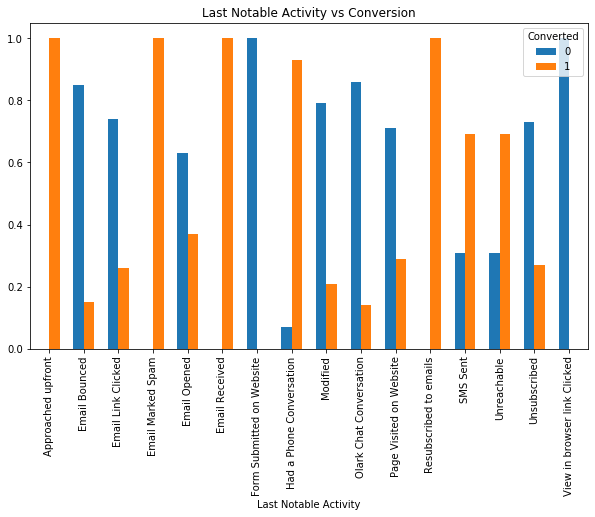

In [60]:
# Last Notable Activity
round(pd.crosstab(lead_df['Last Notable Activity'],lead_df.Converted).apply(lambda r: r/r.sum(),axis=1),2).plot(kind='bar',figsize=(10,6),width=0.6)
plt.title('Last Notable Activity vs Conversion')
xticks(rotation = 90)
plt.show()

#### Analyzing Numerical variables and outliers

In [61]:
# Total Visits
lead_df['TotalVisits'].astype('category').value_counts()

0.0      2161
2.0      1679
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
26.0        2
28.0        2
43.0        1
115.0       1
74.0        1
55.0        1
54.0        1
141.0       1
42.0        1
41.0        1
32.0        1
30.0        1
251.0       1
Name: TotalVisits, dtype: int64

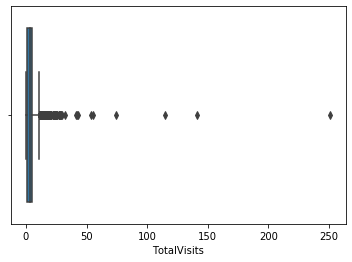

In [62]:
# Total Visits
sns.boxplot(lead_df['TotalVisits'])


There are some outliers in Total Visits Column

**As we can see there are a number of outliers in the data. We will cap the outliers to 95% value for analysis.**

In [63]:
quantiles = lead_df['TotalVisits'].quantile([0.05,0.95]).values
lead_df['TotalVisits'][lead_df['TotalVisits'] <= quantiles[0]] = quantiles[0]
lead_df['TotalVisits'][lead_df['TotalVisits'] >= quantiles[1]] = quantiles[1]

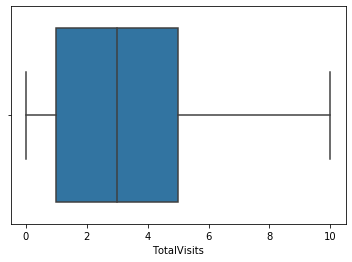

In [64]:
# Total Visits after outlier treatment
sns.boxplot(lead_df['TotalVisits'])
plt.show()

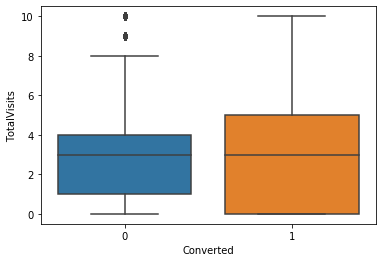

In [65]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_df)

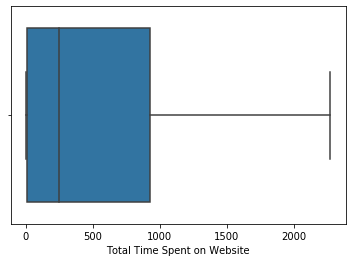

In [66]:
#Total Time spent on website
sns.boxplot(lead_df['Total Time Spent on Website'])
plt.show()

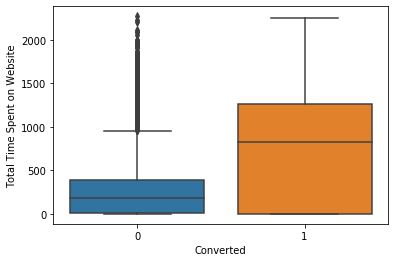

In [67]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead_df)

**Leads spending more time on the website have higher chances of getting converted, Thus the Education X should focus on making their website more engaging**

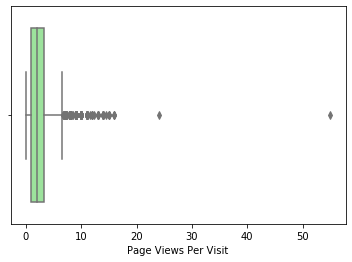

In [68]:
#Pages per visit
sns.boxplot(lead_df['Page Views Per Visit'],color = 'lightgreen')

There are some Outliers here.

**As we can see there are a number of outliers in the data.
We will cap the outliers to 95% value for analysis.**

In [69]:
quantiles = lead_df['Page Views Per Visit'].quantile([0.05,0.95]).values
lead_df['Page Views Per Visit'][lead_df['Page Views Per Visit'] <= quantiles[0]] = quantiles[0]
lead_df['Page Views Per Visit'][lead_df['Page Views Per Visit'] >= quantiles[1]] = quantiles[1]

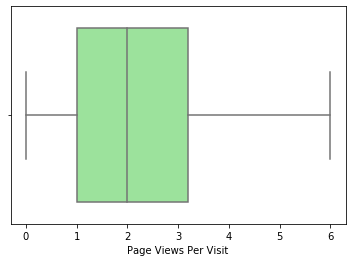

In [70]:
sns.boxplot(lead_df['Page Views Per Visit'], color = 'lightgreen')

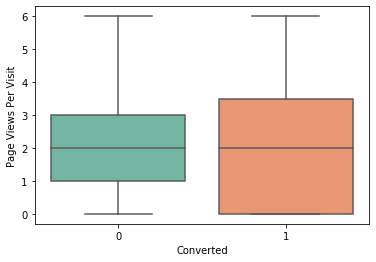

In [71]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = lead_df, palette = 'Set2')

Median value for both converted and unconverted leads is the same.



## Results

__Based on the univariate analysis we have seen that many columns are not adding any information to the model, heance we can drop them for further analysis__

In [72]:
lead_df = lead_df.drop(['Lead Number','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview'],1)

In [73]:
lead_df.shape

(9074, 12)

In [74]:
lead_df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Others,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Others,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Others,Media and Advertising,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Others,Modified


#### Checking Correlation between variables

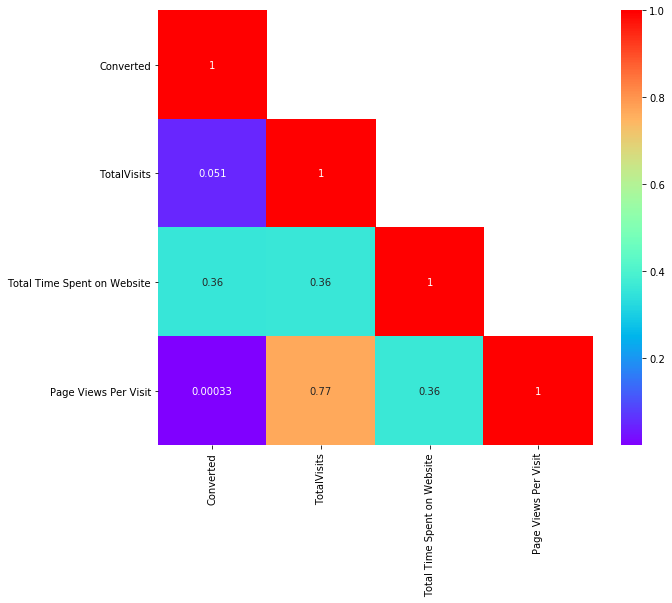

In [75]:
cor_mat= lead_df.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(10,8)
sns.heatmap(cor_mat,mask=mask,square=True,annot=True,cbar=True,cmap="rainbow")
plt.show()

We will further check the correlation while model building using VIF  

### Preparing Data for modelling

Converting some binary variables into 0/1

In [76]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
lead_df[varlist] = lead_df[varlist].apply(binary_map)

#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [77]:
# Creating  dummy variables for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(lead_df[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
                            'Last Notable Activity']], drop_first=True)
dummy1.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Others,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [78]:
# Adding the results to the master dataframe
lead_df = pd.concat([lead_df, dummy1], axis=1)
lead_df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Others,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others,Modified,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Others,Email Opened,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Email Opened,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Others,Media and Advertising,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Others,Modified,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [79]:
#drop additional original variables
lead_df = lead_df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','Last Notable Activity'], axis = 1)

In [80]:
lead_df.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Others,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


### Train-Test Split

In [81]:
from sklearn.model_selection import train_test_split

# Putting feature variable to df_x
df_x= lead_df.drop(['Prospect ID','Converted'], axis=1)

In [82]:
df_x.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Others,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [83]:
# Putting response variable to df_y
df_y = lead_df['Converted']

df_y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [84]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling

In [85]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Others,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [86]:
# Checking the Conversion Rate
Converted = (sum(lead_df['Converted'])/len(lead_df['Converted'].index))*100
Converted

37.85541106458012

We have almost 38% conversion

### Model Building

In [87]:
# Running our first training model

import statsmodels.api as sm

# Logistic regression model
logistic_1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logistic_1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6285
Model Family:                Binomial   Df Model:                           65
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2672.4
Date:                Mon, 08 Feb 2021   Deviance:                       5344.8
Time:                        20:04:08   Pearson chi2:                 6.31e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                                                 24.1760   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Do Not Email                                          -1.5373      0.217     -7.088      0.000      -1.962      -1.112
Do Not Call                                           22.0340   5.29e+04      0.000      1.000   -1.04e+05    1.04e+05
TotalVisits                                            0.2716      0.055      4.935      0.000       0.164       0.380
Total Time Spent on Website                            1.1161      0.040     27.632      0.000       1.037       1.195
Page Views Per Visit                                  -0.3012      0.062     -4.893      0.000      -0.422      -0.181
Lead Origin_Landing Page Submission                   -1.0823      0.133     -8.126      0.000      -1.343      -0.821
Lead Origin_Lead Add Form                             -0.8366      1.451     -0.577      0.564      -3.681       2.008
Lead Origin_Lead Import                               23.1376   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Direct Traffic                            -2.3956      1.942     -1.234      0.217      -6.201       1.410
Lead Source_Facebook                                 -24.3959   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Google                                    -2.0605      1.941     -1.062      0.288      -5.864       1.743
Lead Source_Live Chat                                 23.0059   5.62e+04      0.000      1.000    -1.1e+05     1.1e+05
Lead Source_NC_EDM                                    21.0349   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Olark Chat                                -1.0688      1.933     -0.553      0.580      -4.858       2.720
Lead Source_Organic Search                            -2.1848      1.944     -1.124      0.261      -5.994       1.625
Lead Source_Pay per Click Ads                        -23.8731   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Press_Release                            -23.9088   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Reference                                  2.0992      1.298      1.617      0.106      -0.445       4.644
Lead Source_Referral Sites                            -2.1961      1.965     -1.117      0.264      -6.048       1.656
Lead Source_Social Media                              -0.4938      2.525     -0.196      0.845      -5.442       4.454
Lead Source_WeLearn                                -7.377e-10   6.31e-06     -0.000      1.000   -1.24e-05    1.24e-05
Lead Source_Welingak Website                           4.5088      1.475      3.057      0.002       1.618  

### Feature Selection Using RFE

In [88]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [89]:
rfe.support_

array([ True, False, False,  True, False,  True,  True, False,  True,
       False,  True, False, False, False,  True, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False,  True,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False, False])

In [90]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 18),
 ('TotalVisits', False, 29),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 28),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 19),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 51),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 33),
 ('Lead Source_NC_EDM', False, 31),
 ('Lead Source_Olark Chat', False, 9),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 37),
 ('Lead Source_Press_Release', False, 36),
 ('Lead Source_Reference', False, 2),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 22),
 ('Lead Source_WeLearn', False, 52),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 47),
 ('Lead Source_blog', False, 10),
 ('Lead Source_testone', False, 35),
 ('Lead Source_welearnblog_Home'

In [91]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_Others',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified'],
      dtype='object')

In [92]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Lead Import', 'Lead Source_Facebook',
       'Lead Source_Live Chat', 'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_testone', 'Lead Source_welearnblog_Home',
       'Lead Source_youtubechannel', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Project

##### Assessing the model with StatsModels

In [93]:
# Running our second training model using columns from RFE selection
X_train_sm = sm.add_constant(X_train[col])
logistic_2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logistic_2.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2729.8
Date:                Mon, 08 Feb 2021   Deviance:                       5459.5
Time:                        20:04:19   Pearson chi2:                 6.40e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              1.2965      0.136      9.557      0.000       1.031       1.562
Do Not Email                                      -1.6042      0.174     -9.210      0.000      -1.946      -1.263
Total Time Spent on Website                        1.1144      0.040     28.070      0.000       1.037       1.192
Lead Origin_Landing Page Submission               -1.1952      0.129     -9.290      0.000      -1.447      -0.943
Lead Origin_Lead Add Form                          2.3242      0.230     10.085      0.000       1.873       2.776
Lead Source_Direct Traffic                        -1.3212      0.144     -9.160      0.000      -1.604      -1.039
Lead Source_Google                                -1.0268      0.124     -8.302      0.000      -1.269      -0.784
Lead Source_Organic Search                        -1.1843      0.143     -8.258      0.000      -1.465      -0.903
Lead Source_Referral Sites                        -1.1716      0.326     -3.595      0.000      -1.810      -0.533
Lead Source_Welingak Website                       2.4112      0.755      3.194      0.001       0.931       3.891
Last Activity_Olark Chat Conversation             -0.9345      0.168     -5.560      0.000      -1.264      -0.605
Last Activity_Others                               1.1089      0.228      4.874      0.000       0.663       1.555
Last Activity_SMS Sent                             1.3190      0.074     17.919      0.000       1.175       1.463
Specialization_Others                             -1.4358      0.122    -11.787      0.000      -1.675      -1.197
Last Notable Activity_Had a Phone Conversation     1.9574      1.107      1.768      0.077      -0.213       4.128
Last Notable Activity_Modified                    -0.9245      0.079    -11.654      0.000      -1.080      -0.769
==================================================================================================================
"""

In [94]:
#dropping column based on p-value
col1 = col.drop('Last Notable Activity_Had a Phone Conversation',1)

In [95]:
col1

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_Others', 'Last Notable Activity_Modified'],
      dtype='object')

In [96]:
# Running our third training model
X_train_sm = sm.add_constant(X_train[col1])
logistic_3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logistic_3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2732.0
Date:                Mon, 08 Feb 2021   Deviance:                       5464.1
Time:                        20:04:20   Pearson chi2:                 6.40e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     1.2979      0.136      9.568      0.000       1.032       1.564
Do Not Email                             -1.6258      0.174     -9.325      0.000      -1.967      -1.284
Total Time Spent on Website               1.1131      0.040     28.055      0.000       1.035       1.191
Lead Origin_Landing Page Submission      -1.1976      0.128     -9.324      0.000      -1.449      -0.946
Lead Origin_Lead Add Form                 2.3264      0.231     10.091      0.000       1.875       2.778
Lead Source_Direct Traffic               -1.3174      0.144     -9.144      0.000      -1.600      -1.035
Lead Source_Google                       -1.0196      0.124     -8.251      0.000      -1.262      -0.777
Lead Source_Organic Search               -1.1828      0.143     -8.250      0.000      -1.464      -0.902
Lead Source_Referral Sites               -1.1786      0.326     -3.610      0.000      -1.819      -0.539
Lead Source_Welingak Website              2.4171      0.755      3.201      0.001       0.937       3.897
Last Activity_Olark Chat Conversation    -0.9294      0.168     -5.529      0.000      -1.259      -0.600
Last Activity_Others                      1.2395      0.216      5.735      0.000       0.816       1.663
Last Activity_SMS Sent                    1.3193      0.074     17.919      0.000       1.175       1.464
Specialization_Others                    -1.4391      0.122    -11.821      0.000      -1.678      -1.201
Last Notable Activity_Modified           -0.9327      0.079    -11.767      0.000      -1.088      -0.777
=========================================================================================================
"""

In [97]:
# Checking for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,6.00
4,Lead Source_Direct Traffic,4.07
5,Lead Source_Google,3.12
12,Specialization_Others,2.40
6,Lead Source_Organic Search,1.87
13,Last Notable Activity_Modified,1.84
11,Last Activity_SMS Sent,1.56
9,Last Activity_Olark Chat Conversation,1.50
3,Lead Origin_Lead Add Form,1.46
8,Lead Source_Welingak Website,1.34


In [98]:
# Since VIF for Lead Origin_Landing Page Submission is greater than 5 we will drop it
col2 = col1.drop('Lead Origin_Landing Page Submission')

In [99]:
# Running our fourth training model
X_train_sm = sm.add_constant(X_train[col2])
logistic_4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logistic_4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2777.1
Date:                Mon, 08 Feb 2021   Deviance:                       5554.3
Time:                        20:04:20   Pearson chi2:                 6.49e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.6854      0.115      5.985      0.000       0.461       0.910
Do Not Email                             -1.6414      0.172     -9.547      0.000      -1.978      -1.304
Total Time Spent on Website               1.1310      0.039     28.646      0.000       1.054       1.208
Lead Origin_Lead Add Form                 2.6708      0.226     11.803      0.000       2.227       3.114
Lead Source_Direct Traffic               -1.8797      0.132    -14.237      0.000      -2.138      -1.621
Lead Source_Google                       -1.3587      0.118    -11.489      0.000      -1.590      -1.127
Lead Source_Organic Search               -1.5285      0.139    -11.030      0.000      -1.800      -1.257
Lead Source_Referral Sites               -1.3695      0.329     -4.161      0.000      -2.015      -0.724
Lead Source_Welingak Website              1.9896      0.753      2.642      0.008       0.514       3.466
Last Activity_Olark Chat Conversation    -0.8978      0.166     -5.406      0.000      -1.223      -0.572
Last Activity_Others                      1.2110      0.215      5.627      0.000       0.789       1.633
Last Activity_SMS Sent                    1.2848      0.073     17.641      0.000       1.142       1.428
Specialization_Others                    -0.6862      0.089     -7.712      0.000      -0.861      -0.512
Last Notable Activity_Modified           -0.9250      0.078    -11.818      0.000      -1.078      -0.772
=========================================================================================================
"""

In [100]:
# check VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col2].values, i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Last Notable Activity_Modified,1.83
11,Specialization_Others,1.75
10,Last Activity_SMS Sent,1.53
4,Lead Source_Google,1.49
8,Last Activity_Olark Chat Conversation,1.48
2,Lead Origin_Lead Add Form,1.46
3,Lead Source_Direct Traffic,1.38
7,Lead Source_Welingak Website,1.33
1,Total Time Spent on Website,1.27
5,Lead Source_Organic Search,1.22


All the pvalues and VIF are within range hence we will consider this as our final model

In [101]:
#FINAL MODEL
X_train_sm = sm.add_constant(X_train[col2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2777.1
Date:                Mon, 08 Feb 2021   Deviance:                       5554.3
Time:                        20:04:21   Pearson chi2:                 6.49e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.6854      0.115      5.985      0.000       0.461       0.910
Do Not Email                             -1.6414      0.172     -9.547      0.000      -1.978      -1.304
Total Time Spent on Website               1.1310      0.039     28.646      0.000       1.054       1.208
Lead Origin_Lead Add Form                 2.6708      0.226     11.803      0.000       2.227       3.114
Lead Source_Direct Traffic               -1.8797      0.132    -14.237      0.000      -2.138      -1.621
Lead Source_Google                       -1.3587      0.118    -11.489      0.000      -1.590      -1.127
Lead Source_Organic Search               -1.5285      0.139    -11.030      0.000      -1.800      -1.257
Lead Source_Referral Sites               -1.3695      0.329     -4.161      0.000      -2.015      -0.724
Lead Source_Welingak Website              1.9896      0.753      2.642      0.008       0.514       3.466
Last Activity_Olark Chat Conversation    -0.8978      0.166     -5.406      0.000      -1.223      -0.572
Last Activity_Others                      1.2110      0.215      5.627      0.000       0.789       1.633
Last Activity_SMS Sent                    1.2848      0.073     17.641      0.000       1.142       1.428
Specialization_Others                    -0.6862      0.089     -7.712      0.000      -0.861      -0.512
Last Notable Activity_Modified           -0.9250      0.078    -11.818      0.000      -1.078      -0.772
=========================================================================================================
"""

In [102]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.201719
1012    0.015786
9226    0.343879
4750    0.875337
7987    0.809586
1281    0.838658
2880    0.158414
4971    0.940736
7536    0.870464
1248    0.780193
dtype: float64

In [103]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.20171899, 0.01578593, 0.34387923, 0.87533685, 0.8095857 ,
       0.83865835, 0.15841428, 0.94073576, 0.87046417, 0.78019294])

##### Creating a dataframe with the actual Converted and the predicted probabilities

In [104]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.201719,3009
1,0,0.015786,1012
2,0,0.343879,9226
3,1,0.875337,4750
4,1,0.809586,7987


**Lets us consider cut-off at 0.5 and Create new column 'predicted' with 1 if Churn_Prob > 0.5 else 0**

In [105]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.201719,3009,0
1,0,0.015786,1012,0
2,0,0.343879,9226,0
3,1,0.875337,4750,1
4,1,0.809586,7987,1


In [106]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3417  488]
 [ 761 1685]]


In [107]:
# Accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8033380569988978


Lets us also check other Metrics , apart from Accuracy

In [108]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [109]:
# Sensitivity of our logistic regression model
Sensitivity = TP / float(TP+FN)
Sensitivity

0.6888798037612428

In [110]:
# Specificity of Our logistic regression model
Specificity = TN / float(TN+FP)
Specificity

0.8750320102432778

In [111]:
# false postive rate that is predicting not converted when customer does have converted
FPR = FP/ float(TN+FP)
FPR

0.12496798975672214

In [112]:
# positive predictive value 
print (TP / float(TP+FP))

0.7754256787850897


In [113]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8178554332216371


#### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [114]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [115]:
fpr,tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted,y_train_pred_final.Converted_prob,drop_intermediate=False) 

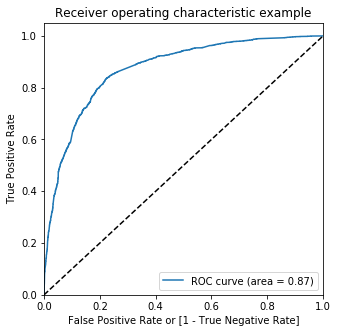

In [116]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

#### Find optimal cutoff point

In [117]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.201719,3009,0,1,1,1,0,0,0,0,0,0,0
1,0,0.015786,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.343879,9226,0,1,1,1,1,0,0,0,0,0,0
3,1,0.875337,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.809586,7987,1,1,1,1,1,1,1,1,1,1,0


In [118]:
# calculating sensitivity,specificity and accuracy for probabilities
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.580853  0.975470  0.333675
0.2   0.2  0.720044  0.920687  0.594366
0.3   0.3  0.795465  0.846280  0.763636
0.4   0.4  0.803023  0.771055  0.823047
0.5   0.5  0.803338  0.688880  0.875032
0.6   0.6  0.781924  0.569910  0.914725
0.7   0.7  0.769643  0.489779  0.944942
0.8   0.8  0.736734  0.371218  0.965685
0.9   0.9  0.691702  0.221586  0.986172


<Figure size 720x432 with 0 Axes>

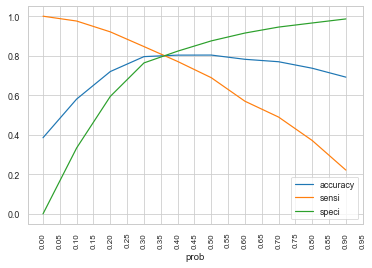

In [119]:
# plot a graph
plt.figure(figsize=[10,6])
sns.set_style("whitegrid")
sns.set_context("paper")
cutoff_df.plot(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1,step=0.05),size=8,rotation=90)
plt.show()

In [120]:
#Optimal cutoff is 0.35. Create new column of final predicted values
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.201719,3009,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.015786,1012,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.343879,9226,0,1,1,1,1,0,0,0,0,0,0,0
3,1,0.875337,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.809586,7987,1,1,1,1,1,1,1,1,1,1,0,1


In [121]:
#Assigning Lead Score
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.201719,3009,0,1,1,1,0,0,0,0,0,0,0,0,20
1,0,0.015786,1012,0,1,0,0,0,0,0,0,0,0,0,0,2
2,0,0.343879,9226,0,1,1,1,1,0,0,0,0,0,0,0,34
3,1,0.875337,4750,1,1,1,1,1,1,1,1,1,1,0,1,88
4,1,0.809586,7987,1,1,1,1,1,1,1,1,1,1,0,1,81


In [122]:
# Accuracy

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8020784128483703

In [123]:
# Let's check the overall accuracy.

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [124]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.802943581357318

In [125]:
# Let us calculate specificity
TN / float(TN+FP)

0.8015364916773368

In [126]:
# Calculate false postive rate - predicting Lead as hot lead when it is not
print(FP/ float(TN+FP))

0.19846350832266324


In [127]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7170500182548375


In [128]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8665559246954596


1) Accuracy of final model on Train dataset is 80%

2) Sensitivity of final model on Train dataset is 80%

3) Specificity of final model on Train dataset is 80%


#### Precision and Recall

In [129]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.final_predicted)
confusion

array([[3130,  775],
       [ 482, 1964]], dtype=int64)

In [130]:
# Precision (TP/TP+FP)

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7170500182548375

In [131]:
# REcall (TP/TP+FN)


confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.802943581357318

**Using sklearn for the same**

In [132]:
from sklearn.metrics import precision_score, recall_score

In [133]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_predicted)

0.7170500182548375

In [134]:
recall_score(y_train_pred_final.Converted , y_train_pred_final.final_predicted)

0.802943581357318

#### Checking Precision recall tradeoff

In [135]:
from sklearn.metrics import precision_recall_curve

In [136]:
y_train_pred_final.Converted,y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    0
 6348    1
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [137]:
p,r,thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [138]:
p[:-1]

array([0.39286862, 0.39277108, 0.39283419, ..., 1.        , 1.        ,
       1.        ])

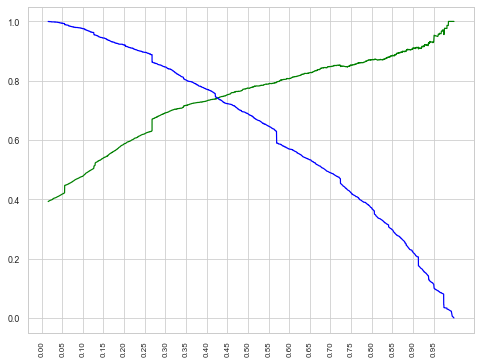

In [139]:
plt.figure(figsize=[8,6])
plt.plot(thresholds,p[:-1],'g-')
plt.plot(thresholds,r[:-1],'b-')
plt.xticks(np.arange(0,1,step=0.05),size=8,rotation=90)
plt.show()

**Optimal cut-off from precision-recall tradeoff is 0.42**

In [140]:
#Optimal cutoff is 0.42
y_train_pred_final['final_predicted2'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score,final_predicted2
0,0,0.201719,3009,0,1,1,1,0,0,0,0,0,0,0,0,20,0
1,0,0.015786,1012,0,1,0,0,0,0,0,0,0,0,0,0,2,0
2,0,0.343879,9226,0,1,1,1,1,0,0,0,0,0,0,0,34,0
3,1,0.875337,4750,1,1,1,1,1,1,1,1,1,1,0,1,88,1
4,1,0.809586,7987,1,1,1,1,1,1,1,1,1,1,0,1,81,1


In [141]:
#Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted2)

0.8033380569988978

In [142]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_predicted2)

0.738731551655365

In [143]:
recall_score(y_train_pred_final.Converted , y_train_pred_final.final_predicted2)

0.7571545380212592

We are getting a better balance between Precision and Recall using 0.42 as cutoff, So lets use 0.42 as cut off for predicting  Test Dataset

### Making predictions on test dataset

In [144]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Others,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3271,0,0,0.304501,-0.591008,0.998931,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1490,0,0,0.666261,1.894051,1.564920,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7936,0,0,-0.419021,-0.743117,-0.133048,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4216,0,0,-1.142542,-0.878732,-1.265027,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3830,0,0,1.751544,-0.578179,2.130909,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [145]:
X_test = X_test[col2]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Specialization_Others,Last Notable Activity_Modified
3271,0,-0.591008,0,0,1,0,0,0,0,0,0,1,0
1490,0,1.894051,0,1,0,0,0,0,0,0,0,0,0
7936,0,-0.743117,0,0,1,0,0,0,0,0,0,1,0
4216,0,-0.878732,1,0,0,0,0,0,0,0,0,0,1
3830,0,-0.578179,0,0,0,1,0,0,0,0,0,0,0


In [146]:
X_test_sm = sm.add_constant(X_test)

Making Prediction on test dataset

In [147]:
y_test_pred = res.predict(X_test_sm)

In [148]:
y_test_pred[:10]

3271    0.116300
1490    0.720668
7936    0.099753
4216    0.808044
3830    0.182873
1800    0.180993
6507    0.471287
4821    0.315484
4223    0.950778
4714    0.346415
dtype: float64

In [149]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [150]:
# Let's see the head
y_pred_1.head()

,0
3271,0.116300
1490,0.720668
7936,0.099753
4216,0.808044
3830,0.182873


In [151]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [152]:
# Putting LeadID to index
y_test_df['Prospect ID'] = y_test_df.index

In [153]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [154]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [155]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.116300
1,1,1490,0.720668
2,0,7936,0.099753
3,1,4216,0.808044
4,0,3830,0.182873


In [156]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [157]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,3271,0.116300
1,1,1490,0.720668
2,0,7936,0.099753
3,1,4216,0.808044
4,0,3830,0.182873


In [158]:
#Using cutoff obtained from precision-recall tradeoff
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.42 else 0)

In [159]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob,final_predicted
0,0,3271,0.116300,0
1,1,1490,0.720668,1
2,0,7936,0.099753,0
3,1,4216,0.808044,1
4,0,3830,0.182873,0


In [160]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7994858611825193

**Accuracy on test dataset is around 79% which is good.**

In [161]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1438,  296],
       [ 250,  739]], dtype=int64)

In [162]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

We will check both sensitivity and specifity for the model

In [163]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7472194135490394

In [164]:
# Let us calculate specificity
TN / float(TN+FP)

0.8292964244521338

#### Precision and Recall

In [165]:
confusion = metrics.confusion_matrix(y_pred_final.Converted,y_pred_final.final_predicted)
confusion

array([[1438,  296],
       [ 250,  739]], dtype=int64)

In [166]:
#Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7140096618357488

In [167]:
#Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7472194135490394

In [168]:
#ROC CURVE
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [169]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.Converted, y_pred_final.Converted_prob, drop_intermediate = False )

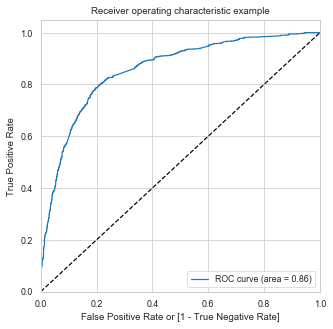

In [170]:
draw_roc(y_pred_final.Converted, y_pred_final.Converted_prob)

**Area under the ROC Curve is 0.86 and the curve is towards the upper left corner. It indicates that our model is good**

#### Lead Score

In [171]:
#Assigning Lead Score
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))
y_pred_final.head(10)

,Converted,Prospect ID,Converted_prob,final_predicted,Lead_Score
0,0,3271,0.116300,0,12
1,1,1490,0.720668,1,72
2,0,7936,0.099753,0,10
3,1,4216,0.808044,1,81
4,0,3830,0.182873,0,18
5,1,1800,0.180993,0,18
6,0,6507,0.471287,1,47
7,0,4821,0.315484,0,32
8,1,4223,0.950778,1,95
9,0,4714,0.346415,0,35


#### Top Features/Prdictors

In [172]:
# Getting the parameters from final Model

pd.options.display.float_format = '{:.2f}'.format
final_parameters = res.params[1:]
final_parameters

Do Not Email                            -1.64
Total Time Spent on Website              1.13
Lead Origin_Lead Add Form                2.67
Lead Source_Direct Traffic              -1.88
Lead Source_Google                      -1.36
Lead Source_Organic Search              -1.53
Lead Source_Referral Sites              -1.37
Lead Source_Welingak Website             1.99
Last Activity_Olark Chat Conversation   -0.90
Last Activity_Others                     1.21
Last Activity_SMS Sent                   1.28
Specialization_Others                   -0.69
Last Notable Activity_Modified          -0.92
dtype: float64

In [173]:
#Getting a relative coeffient value for all the features wrt the feature with the highest coefficient

top_predictors = final_parameters
top_predictors = 100.0 * (top_predictors / top_predictors.max())
top_predictors

Do Not Email                            -61.46
Total Time Spent on Website              42.35
Lead Origin_Lead Add Form               100.00
Lead Source_Direct Traffic              -70.38
Lead Source_Google                      -50.87
Lead Source_Organic Search              -57.23
Lead Source_Referral Sites              -51.28
Lead Source_Welingak Website             74.50
Last Activity_Olark Chat Conversation   -33.62
Last Activity_Others                     45.34
Last Activity_SMS Sent                   48.11
Specialization_Others                   -25.69
Last Notable Activity_Modified          -34.63
dtype: float64

In [174]:
# Sorting the Predictor variables based on their relative coefficient values

top_predictors_sort = np.argsort(top_predictors,kind='quicksort',order='list of str')
top_predictors_sort

Do Not Email                              3
Total Time Spent on Website               0
Lead Origin_Lead Add Form                 5
Lead Source_Direct Traffic                6
Lead Source_Google                        4
Lead Source_Organic Search               12
Lead Source_Referral Sites                8
Lead Source_Welingak Website             11
Last Activity_Olark Chat Conversation     1
Last Activity_Others                      9
Last Activity_SMS Sent                   10
Specialization_Others                     7
Last Notable Activity_Modified            2
dtype: int64

<Figure size 864x576 with 0 Axes>

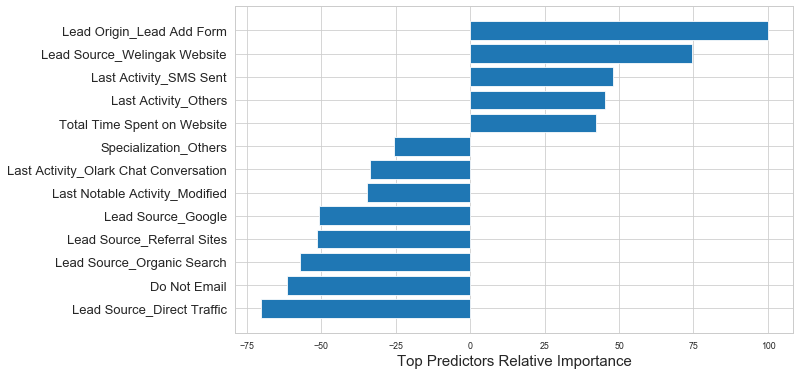

In [175]:
# Plotting the predictors based on their relative importance

%matplotlib inline
fig = plt.figure(figsize = (12,8))
pos = np.arange(top_predictors_sort.shape[0]) + .5

fig1 = plt.figure(figsize=(10,6))
ax = fig1.add_subplot(1, 1, 1)
ax.barh(pos, top_predictors[top_predictors_sort])
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X_train[col2].columns)[top_predictors_sort], fontsize=13)
ax.set_xlabel('Top Predictors Relative Importance', fontsize=15)
plt.show()

#### Conclusion

**~71% of Precision value indicates that 71% of the conversions that our model predicted is actually converted.**

**~74% of Recall value indicates that our model is able to predict 74% of actual conversion cases correctly**


The lead scores are assigned to each lead to help X Education in identifying the potential leads, called as 'Hot leads’. The company can successfully identify this set of leads, the lead conversion rate is expected to go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. 

The potential leads can be decided based on lead scores assigned to each lead. 

If the lead score is higher i.e., greater than 80, then the lead is hot and is most likely to convert. 

If the lead score is low i.e., let's say less than 50, then lead is low and will mostly not get converted.
